In [2]:
import torch
import matplotlib.pyplot as plt
import numpy as np

import sys
sys.path.append("..")

from Utils import reimporter
reimporter.FreezeModules()

import ptvsd
ptvsd.enable_attach(("0.0.0.0", 5679))

('0.0.0.0', 5679)

tensor(1., dtype=torch.float64)


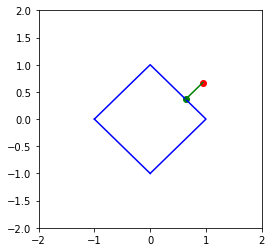

In [12]:
reimporter.Reimport()
from Modules.Projectors import duchi_sort
from Modules.Projectors.michelot import michelot
from Modules.Projectors import descent

def plot_2d(x, x_proj, s=1):
    l1_ball_pts = np.array([
        [-1, 0],
        [0, 1],
        [1, 0],
        [0, -1]
    ])

    plt.figure(figsize=(4,4))

    plt.plot(l1_ball_pts[:, 0], l1_ball_pts[:, 1], color="blue")
    plt.plot(l1_ball_pts[[-1,0], 0], l1_ball_pts[[-1, 0], 1], color="blue")

    plt.scatter(x[0], x[1], color="red")
    plt.scatter(x_proj[0], x_proj[1], color="green")

    size = max(np.abs(x))*2
    size = max(2, size)

    plt.plot([x[0], x_proj[0]], [x[1], x_proj[1]], color="green")
    plt.xlim(-size, size)
    plt.ylim(-size, size)

x = torch.rand(5,2, dtype=torch.float64).abs()

x_proj = descent.descent_l1(x)
plot_2d(x[0], x_proj[0])
print (x_proj[0].norm(p=1))

In [13]:
reimporter.Reimport()
from Modules.Projectors.michelot import michelot
from Modules.Projectors import duchi_sort
from Modules.Projectors import duchi_sort_numpy
from Modules.Projectors import condat
from Modules.Projectors import descent

from Utils.test_projector import test_projector

test_projector(descent.descent_l1)

True

Running Descent DIM: tensor(25)

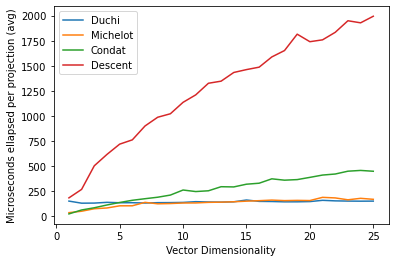

In [28]:
reimporter.Reimport()

from Utils.metrics import generate_metrics

results = generate_metrics(n=100, dim=25, projectors={
    "Duchi": duchi_sort.project_l1_ball_serial,
    "Michelot": michelot,
    "Condat": condat.condat_l1,
    "Descent": descent.descent_l1
}, plot=True)